# Pump Curves - Ulka E5 and Fluid-o-Tech 1106

The [Ulka E5](http://www.cemegroup.com/solenoid-pump/e5-60) and [Fluid-o-Tech 1106](http://www.fluidotech.it/Pages/solenoid-pump-mono.aspx) are solenoid pump (aka vibration pump) models commonly used in domestic espresso machines. A pump curve reflects the achievable discharge pressure at a given flowrate, which is limited by pump power and influenced by pump speed and efficiency.

## 1. Setup
### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
# Turn interactive plotting off
plt.ioff()

### Conversion Factors

In [3]:
mL_per_US_gallon = 3785.41
mL_per_L = 1000.0

sec_per_min = 60.0
sec_per_hr = 60.0 * sec_per_min

## 2. Pump curve data

### Import the data

In [4]:
FluidOTech = pd.read_csv(r'https://github.com/DIYCoffeeGuy/data/raw/master/Fluidotech%201106%20Pump%20Curve.csv')
Ulka = pd.read_csv(r'https://github.com/DIYCoffeeGuy/data/raw/master/Ulka%20E5%20Pump%20Curve.csv')

### Standardise the units.

In [5]:
FluidOTech['Volumetric Flowrate (mL/s)'] = FluidOTech['Volumetric Flowrate (L/h)'] * mL_per_L / sec_per_hr
Ulka['Volumetric Flowrate (mL/s)'] = Ulka['Volumetric Flowrate (mL / min)'] / sec_per_min

### Take a look at the data.

In [6]:
FluidOTech[['Discharge Pressure (barg)','Volumetric Flowrate (mL/s)']]

,Discharge Pressure (barg),Volumetric Flowrate (mL/s)
0,11.93,0.233333
1,11.67,0.363889
2,11.44,0.705556
3,11.23,0.966667
4,10.98,1.288889
5,10.73,1.513889
6,10.52,1.780556
7,10.33,1.894444
8,10.19,2.119444
9,10.00,2.136111


In [7]:
Ulka[['Discharge Pressure (barg)','Volumetric Flowrate (mL/s)']]

,Discharge Pressure (barg),Volumetric Flowrate (mL/s)
0,14.954373,0.025157
1,14.646388,0.226415
2,14.338403,0.452830
3,13.961977,0.654088
4,13.722433,0.880503
5,13.414449,1.056604
6,13.106464,1.207547
7,12.901141,1.383648
8,12.695817,1.584906
9,12.490494,1.761006


## 3. Plotting the Curves

In [8]:
fig, axes = plt.subplots(figsize=(12,8));

### Add the pump curve data

In [9]:
FluidOTech.plot(
    kind='line',
    x='Discharge Pressure (barg)',
    y='Volumetric Flowrate (mL/s)',
    ax=axes,
    xlim=(0,15),
    legend=True,
    linestyle='dashed',
    color='b');

In [10]:
Ulka.plot(
    kind='line',
    ax=axes,
    x='Discharge Pressure (barg)',
    xlim=(0,15),
    y='Volumetric Flowrate (mL/s)',
    linestyle='solid',
    color='r');

### Configure the plot layout and labels

In [11]:
#Configure the legend
lines, labels = axes.get_legend_handles_labels()[0], ['Fluid-o-Tech 1106','Ulka E5']
axes.legend(lines, labels, loc='best');
axes.set_title('Comparison of Vibration Pump Curves', fontsize=20)

In [12]:
#Add ticks to the x-axes
axes.set_xticks(range(0,16));

In [13]:
#Configure LH y-axes
axes.set_yticks(range(0,13))
axes.set_ylabel('Volumetric Flowrate (mL/s)');

In [14]:
#Add and configure RH y-axis
axes2 = axes.twinx()
axes2.set_yticks(np.arange(0.0,0.251,0.025))
axes2.set_ylim(0,60*15/mL_per_US_gallon)
axes2.set_ylabel('Volumetric Flowrate (US gal/min)');

### Display chart

In [15]:
fig.tight_layout()

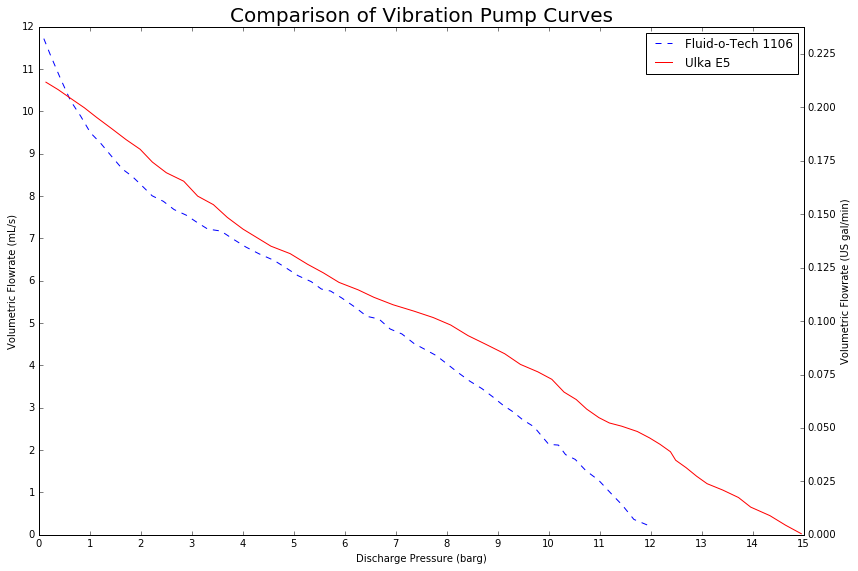

In [16]:
plt.show()